In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
df = pd.read_csv("./data/p1.csv", parse_dates=['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

x = df['Close']
y = df['SES']
size = int(len(x) * 0.8)

x_train, x_test = x[:size], x[size:]
y_train, y_test = y[:size], y[size:]

In [24]:
model = SARIMAX(
    x_train,
    exog=y_train,
    order=(1, 0, 1),
    seasonal_order=(3, 1, 1, 12)
)
result = model.fit()

forecast = result.get_forecast(steps=len(x_test), exog=y_test)
forecast_mean = forecast.predicted_mean


D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


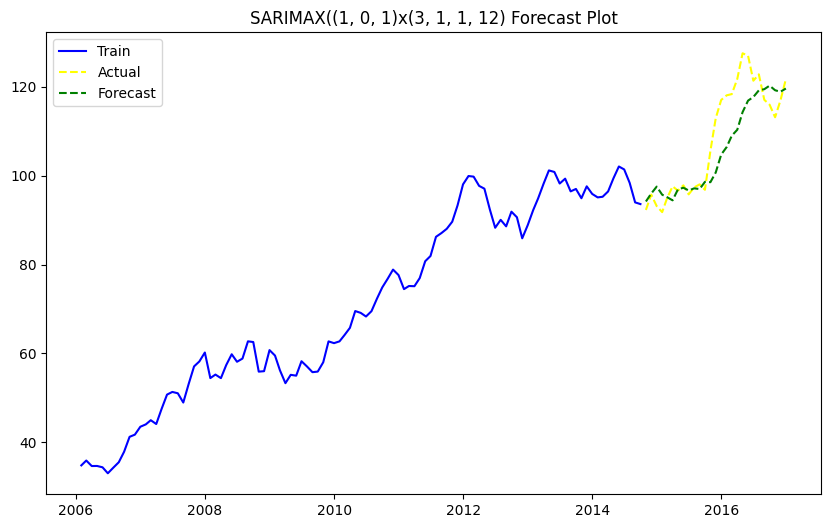

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, color='blue', label='Train')
plt.plot(x_test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast_mean, color='green', label='Forecast', linestyle='--')
plt.title("SARIMAX((1, 0, 1)x(3, 1, 1, 12) Forecast Plot")
plt.legend()
plt.show()